In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Kernel PCA

In [5]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf') # RBF 함수를 추가
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

In [6]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [11]:
# PCA된 데이터의 컬럼명을 PC1, PC2로 한다.
pca_columns=['PC1','PC2']
X_train_pca = pd.DataFrame(X_train ,columns=pca_columns)
X_train_pca['target']=dataset.Customer_Segment
display(X_train_pca.tail())

# 주성분 분석 이후 평균/표준편차 확인 
display(X_train_pca.describe())
kpca.explained_variance_ratio_

,PC1,PC2,target
137,0.081877,0.560225,3
138,-0.041896,0.486269,3
139,0.013705,0.533377,3
140,-0.538402,-0.225160,3
141,0.455450,-0.348037,3


,PC1,PC2,target
count,1.420000e+02,1.420000e+02,142.000000
mean,-1.133678e-17,1.563694e-18,1.669014
std,3.683019e-01,2.991201e-01,0.627071
min,-5.765028e-01,-3.757184e-01,1.000000
25%,-3.595036e-01,-2.452932e-01,1.000000
50%,2.602075e-03,-9.427982e-02,2.000000
75%,3.591963e-01,2.721646e-01,2.000000
max,5.824808e-01,6.196798e-01,3.000000


AttributeError: 'KernelPCA' object has no attribute 'explained_variance_ratio_'

# 결과

### 혼동행렬

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


1.0

### 시각화

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


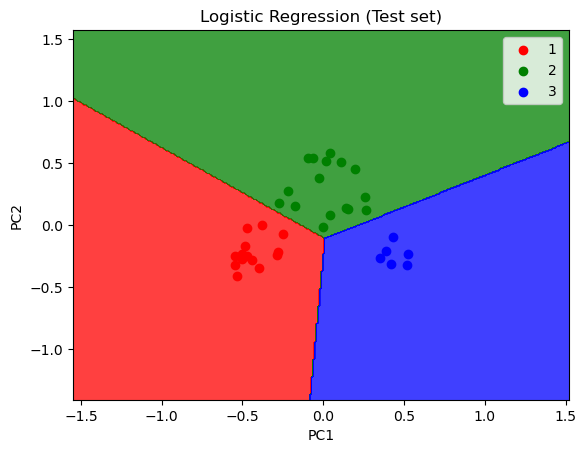

In [8]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

새로운 차원에 있기 때문에 기존 PCA 보다 높은 분산인 것을 볼 수 있다.